### Enter a logs.csv file output in my format and it will graph the results.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys

%matplotlib inline
sys.path.append('../')

from common.plot_style_utils import set_pub_plot_context, save_for_pub

In [2]:
set_pub_plot_context(context="paper")
palette = sns.color_palette()
sns.set_style("white")

In [3]:
file = "../../data/CNN/nv_exact_params_our_data_logs.csv"

In [4]:
results = pd.read_csv(file)
results = results[results.global_step <= 787800]
smoothing = True
smooth_window = 10

In [5]:
results

,global_step,train_loss,train_accuracy,val_loss,val_accuracy
0,300,6.316863,0.149583,5.790829,0.183900
1,600,5.430000,0.212083,5.434462,0.214707
2,900,5.222641,0.222083,5.197881,0.231449
3,1200,4.880716,0.265000,5.020438,0.253415
4,1500,4.753708,0.280000,4.895827,0.267479
5,1800,4.495733,0.309583,4.757352,0.281141
6,2100,4.494317,0.310000,4.675392,0.283954
7,2400,4.300908,0.335833,4.551505,0.298955
8,2700,4.164006,0.342500,4.456710,0.308733
9,3000,4.174553,0.338333,4.370036,0.315832


In [6]:

if smoothing:
    results['train_loss'] = results['train_loss'].rolling(smooth_window).mean()
    results['val_loss'] = results['val_loss'].rolling(smooth_window).mean()
    results['train_accuracy'] = results['train_accuracy'].rolling(smooth_window).mean()
    results['val_accuracy'] = results['val_accuracy'].rolling(smooth_window).mean()

In [7]:
# Removes smoothing artifact
results = results.iloc[:-smooth_window,:]

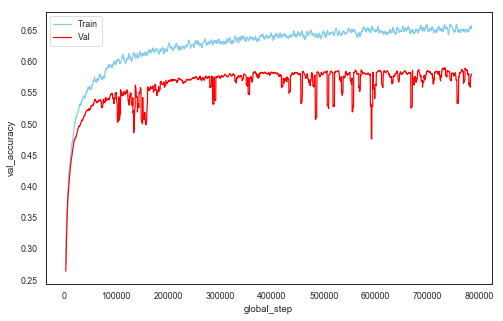

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
sns.relplot(x='global_step', y='train_accuracy', data=results, kind='line', label="Train", ax=ax);
sns.relplot(x='global_step', y='val_accuracy', data=results, kind='line', color='r', label="Val", ax=ax);
plt.close(2)
plt.close(3)
ax.legend()
plt.show(ax)
!mkdir ../../data/manuscript/figs/supp/
!mkdir ../../data/manuscript/figs/supp/nv_accuracy
save_for_pub(fig, path="../../data/manuscript/figs/supp/nv_accuracy/v0", dpi=200)